<a href="https://colab.research.google.com/github/pmama/DeepLearningConcepts/blob/main/Fashion_MNIST_DL_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>**Fashion MNIST with Deep Learning**</font>
![](https://blog.cloudxlab.com/wp-content/uploads/2019/06/Tensorflow_Keras.png)

### **Dataset**
This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.
### **Label	Description**
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boo

### **Import Necessary Libraries**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.utils import plot_model

### **Loading Dataset**

In [12]:
from keras.api._v2.keras.datasets import fashion_mnist
fasion_mnist = keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

### **Splitting into train and test :**

In [13]:
(train_images, y_train),(test_images, y_test) = fasion_mnist.load_data()

In [14]:
print('=================  Train Data ===================')
print(f'Grayscale train images data size :{train_images.shape}')
print(f'Grayscale train labels data size : {y_train.shape}')
print()
print('=================  Test Data ====================')
print(f'Grayscale test images data size  : {test_images.shape}')
print(f'Grayscale test labels data  size :{y_test.shape}')

=================  Train Data ===================
Grayscale train images data size :(60000, 28, 28)
Grayscale train labels data size : (60000,)

=================  Test Data ====================
Grayscale test images data size  : (10000, 28, 28)
Grayscale test labels data  size :(10000,)


In [15]:
label_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt','Sneaker','Bag','AnkleBoot']
len(label_name)

10

### **Normalize the image dataset**

In [16]:
x_train =train_images/255.0
x_test = test_images/255.0

### **Visualising Image before and after normalization**

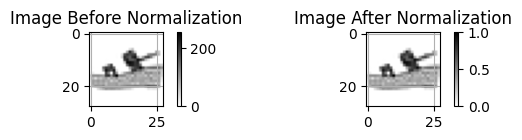

In [17]:
plt.figure(figsize=(6,1.5))
plt.subplot(1,2,1)
plt.imshow(train_images[12], cmap =plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.title('Image Before Normalization')

plt.subplot(1,2,2)
plt.imshow(x_train[12], cmap =plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.title('Image After Normalization')
plt.tight_layout()
plt.show()

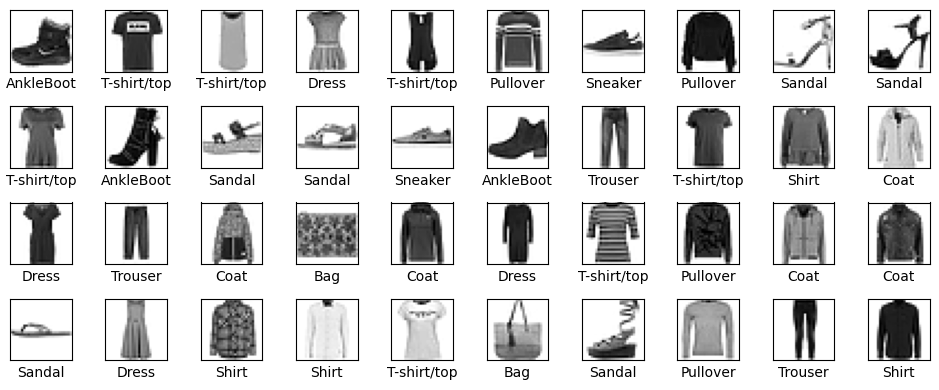

In [18]:
# Visualising array of pictures
plt.figure(figsize=(10,4))
for i in range(40):
  plt.subplot(4,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i],cmap =plt.cm.binary)
  plt.xlabel(label_name[y_train[i]])
  plt.tight_layout()
plt.show()

In [19]:
! pip install visualkeras
import visualkeras

In [20]:
y_train_df= pd.DataFrame(y_train)
y_test_df= pd.DataFrame(y_test)
total_class = y_train_df[0].nunique()
all_class = y_train_df[0].unique()
print(f'Total number of classes :{total_class},\nlabels are:{all_class}')


Total number of classes :10,
labels are:[9 0 3 2 7 5 1 6 4 8]


In [21]:
y_train_df.value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

In [22]:
y_test_df[0].value_counts()

9    1000
2    1000
1    1000
6    1000
4    1000
5    1000
7    1000
3    1000
8    1000
0    1000
Name: 0, dtype: int64

array([[2.26878171e-25, 1.33275999e-27, 1.50018625e-24, ...,
        2.98500058e-10, 7.59430908e-26, 9.99999940e-01],
       [5.42800978e-11, 3.57577289e-38, 9.74646628e-01, ...,
        4.58290684e-26, 1.56684982e-21, 6.61748296e-27],
       [1.98884385e-37, 9.99999940e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.81618397e-36, 0.00000000e+00, 5.44399157e-35, ...,
        0.00000000e+00, 9.99999940e-01, 0.00000000e+00],
       [1.92134207e-35, 9.99999940e-01, 0.00000000e+00, ...,
        0.00000000e+00, 6.85216060e-38, 0.00000000e+00],
       [1.61537590e-15, 2.02074499e-25, 1.28492113e-15, ...,
        6.85098371e-07, 6.21323652e-12, 2.42904697e-17]], dtype=float32)

In [23]:
model0 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(units = total_class,activation ='softmax')
])
model0.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
#=======================================================================================
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation="relu"),
    Dropout(rate=0.2),
    Dense(128, activation="relu"),
    Dense(units = total_class,activation ='softmax')
])
#================================================================================================
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation="relu"),
    Dropout(rate=0.2),
    Dense(128, activation="relu"),
    Dropout(rate=0.2),
    Dense(units = total_class,activation ='softmax')
])
#============================================================================================
model3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation="relu"),
    Dropout(rate=0.3),
    Dense(128, activation="relu"),
    Dropout(rate=0.3),
    Dense(units = total_class,activation ='softmax')
])
#================================================================================================
model4 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation="relu"),
    Dropout(rate=0.5),
    Dense(128, activation="relu"),
    Dropout(rate=0.5),
    Dense(units = total_class,activation ='softmax')
])


models = [model0, model1, model2, model3, model4]
for idx,model in enumerate(models):
  model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
  print(f'Model Structure {idx}')
  model.summary()
  print()

  print()


  visualkeras.layered_view(model)
  plt.show()

Model Structure 0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model Structure 1
Model: "sequential_1"
_________________________________________________________________
 Layer (type)         

In [24]:
for idx, model in enumerate(models):
    # Create a figure for each model
    plt.figure()

    # Visualize the model's architecture
    visualkeras.layered_view(model, to_file=f"model_{idx}.png")

    # Close the current figure to release resources (optional)
    plt.close()

In [25]:
from IPython.display import Image, display
for idx in range(len(models)):
  print(f'The structure of model{idx}')
  display(Image(filename=f"model_{idx}.png"))

The structure of model0


The structure of model1


The structure of model2


The structure of model3


The structure of model4


           The structure of model0


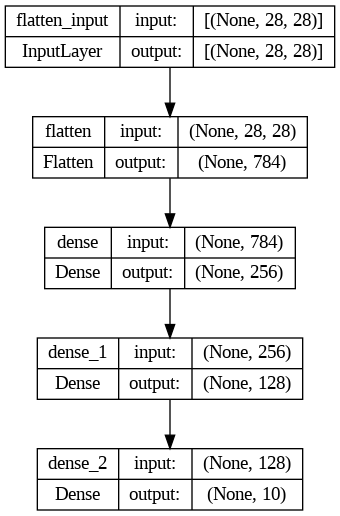


           The structure of model1


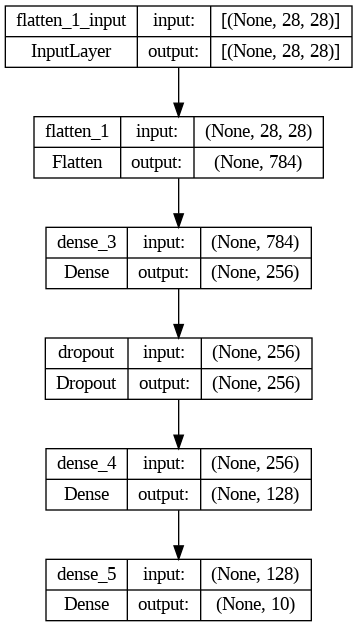


           The structure of model2


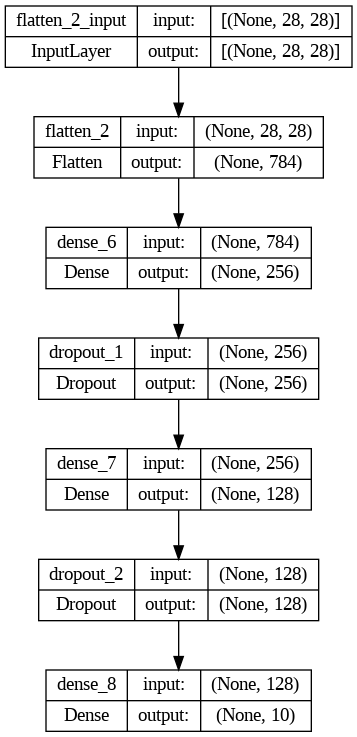


           The structure of model3


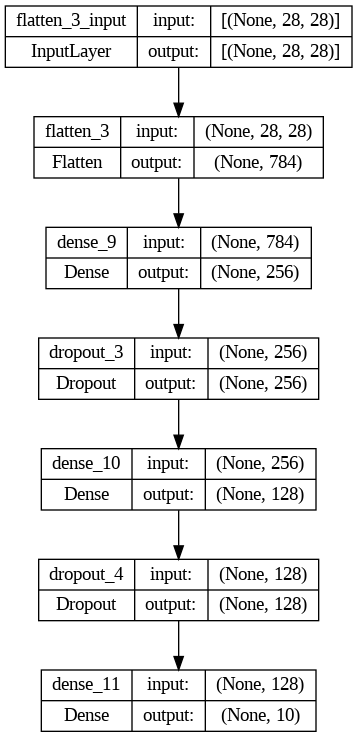


           The structure of model4


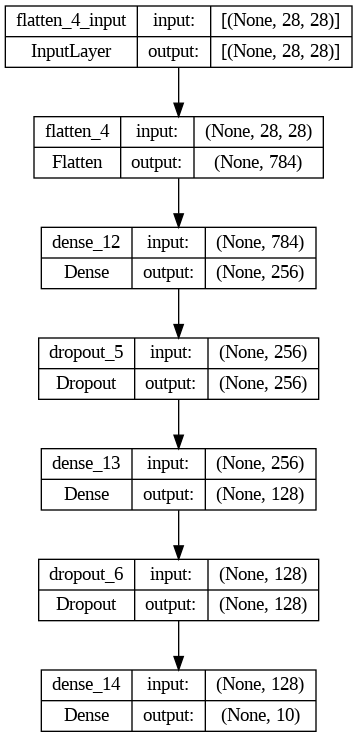

In [26]:
for idx,model in enumerate(models):

  plot_model(model, show_shapes=True,  to_file=f"plot_model_{idx}.png")
# for idx in range(len(models)):
  print('===='*20)
  print(' '*10,f'The structure of model{idx}')
  print('===='*20)
  display(Image(filename=f"plot_model_{idx}.png"))
  print()


In [27]:
for idx,model in enumerate(models):
  print(f'model{idx}')
  model.fit(x_train, y_train, validation_data=(x_test, y_test),  epochs = 50,shuffle = True)
  print()
  print('===='*20)

model0
Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4796 - accuracy: 0.8271 - val_loss: 0.4024 - val_accuracy: 0.8544
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3606 - accuracy: 0.8679 - val_loss: 0.3824 - val_accuracy: 0.8617
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3249 - accuracy: 0.8790 - val_loss: 0.3629 - val_accuracy: 0.8674
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3011 - accuracy: 0.8869 - val_loss: 0.3558 - val_accuracy: 0.8728
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2853 - accuracy: 0.8940 - val_loss: 0.3430 - val_accuracy: 0.8739
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2699 - accuracy: 0.8985 - val_loss: 0.3392 - val_accuracy: 0.8802
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2567 - accuracy: 0.9029 - val_loss: 0.3420 - val_a

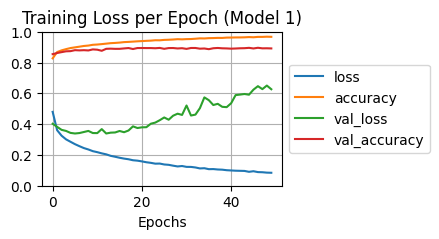

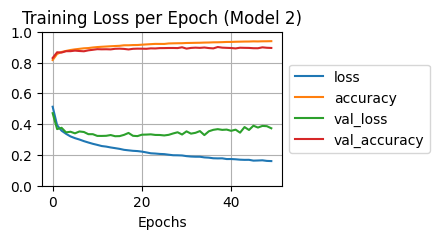

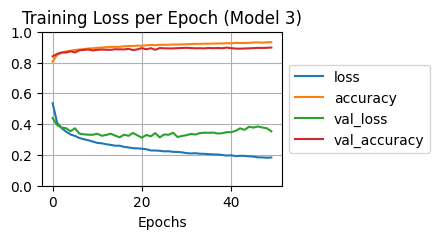

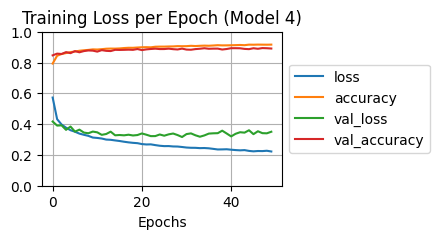

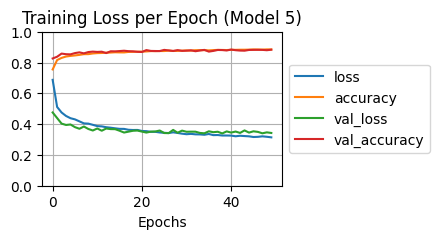

In [28]:
for i, model in enumerate(models):
    losses = pd.DataFrame(model.history.history)
    plt.figure(figsize=(18, 2))
    plt.subplot(1, len(models), i + 1)
    losses.plot(ax=plt.gca())
    plt.grid()
    plt.gca().set_ylim(0, 1)
    plt.xlabel('Epochs')
    plt.ylabel('')
    plt.title(f'Training Loss per Epoch (Model {i+1})')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

- **Model 1 :** This model consists of two hidden layers with 256 and 128 neurons in the 1st and 2nd hidden layers, respectively. While the accuracy is good, there is a significant gap between the training loss and validation loss, indicating overfitting.   
<font color='indianred'>

> - Training Loss: 0.0841
> - Validation Loss: 0.6264
> - Training Accuracy: 0.9668
> - Validation Accuracy: 0.8915
> - Issue: Significant overfitting (large gap between training and validation losses).</font>

- **Model 2 :** To address overfitting in Model 1, a dropout layer with a probability of 0.2 is added between the 1st and 2nd hidden layers. While the gap between training and validation losses is reduced, overfitting is still evident.
<font color='orange'>

> - Training Loss: 0.1600
> - Validation Loss: 0.3531
> - Training Accuracy: 0.9387
> - Validation Accuracy: 0.8946
> - Issue: Overfitting, but reduced compared to Model 1.
</font>

- **Model 3 :** In an attempt to further mitigate overfitting in Model 2, another dropout layer with a probability of 0.2 is introduced after the 2nd hidden layer. While this reduces the gap between training and validation losses, some overfitting remains.
<font color='darkviolet'>

> - Training Loss: 0.1833
> - Validation Loss: 0.3531
> - Training Accuracy: 0.9317
> - Validation Accuracy: 0.8974
> - Issue: Overfitting, further reduced compared to Model 2.
</font>

- **Model 4 :** In an effort to improve performance, the dropout probabilities in the two dropout layers are increased to 0.3. This helps address overfitting to some extent. For futher improvement, the probabilty of two dropout layers was increased to 0.3: it has positive effect on overfitting problem.   
<font color='green'>

> - Training Loss: 0.2224
> - Validation Loss: 0.3505
> - Training Accuracy: 0.9162
> - Validation Accuracy: 0.8909
> - Overfitting, but with competitive validation performance
</font>

- **Model 5 :** For further improvement, the dropout probabilities in the two dropout layers are increased to 0.5. Although this configuration reduce the gap between the loss further, the accuracy acheived got reduced   
<font color='darkblue'>

> - Training Loss: 0.3142
> - Validation Loss: 0.3426
> - Training Accuracy: 0.8850
> - Validation Accuracy: 0.8833
> - slightly lower validation accuracy.
</font>


### **Evaluation of the Model**

In [47]:
model_accuracy =[]
model_loss =[]
for idx, model in enumerate(models):
  print('****'*20)
  print(f'The structure of model{idx}')
  display(Image(filename=f"model_{idx}.png"))
  print(f' Evaluation of model{idx}:')
  model_loss.append(model.evaluate(x_test, y_test)[0])
  model_accuracy.append(model.evaluate(x_test, y_test)[1])

********************************************************************************
The structure of model0


 Evaluation of model0:
313/313 [==============================] - 1s 2ms/step - loss: 0.6264 - accuracy: 0.8915
********************************************************************************
The structure of model1


 Evaluation of model1:
313/313 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8946
********************************************************************************
The structure of model2


 Evaluation of model2:
313/313 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8974
********************************************************************************
The structure of model3


 Evaluation of model3:
313/313 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8909
********************************************************************************
The structure of model4


 Evaluation of model4:
313/313 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8833


In [61]:
model_name =['model0','model1', 'model2', 'model3', 'model4']
model_data ={'Model':model_name, 'Accuracy': model_accuracy, 'Loss' : model_loss}
model_eval = pd.DataFrame(model_data)
model_eval.set_index('Model', inplace = True)
model_eval

,Accuracy,Loss
Model,,
model0,0.8915,0.626447
model1,0.8946,0.372937
model2,0.8974,0.353148
model3,0.8909,0.350507
model4,0.8833,0.342625


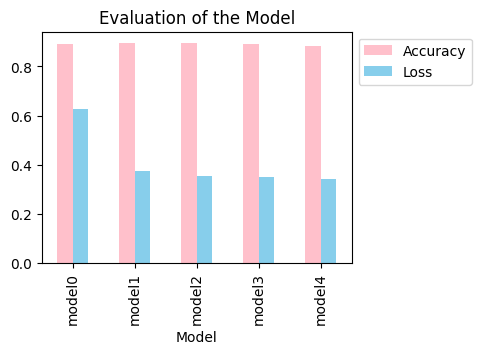

In [62]:
model_eval.plot(kind = 'bar', color =['pink','skyblue'], figsize=(4,3))
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Evaluation of the Model')
plt.show()

## **Conclusion**
- Using Deep Neural Network along with Dropout concept, an accuracy of 89% is achieved and overfitting issue is adressed effectively.
- There is still a small window for enhancement using ther reguralisation techniques.
- Result can be best acheived by Convolutional Neural Network.